In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
import statsmodels.formula.api
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

## Load Datasets

In [3]:
data = pd.read_csv('bankloans.csv')

In [4]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.8 KB


In [6]:
data.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [7]:
#splitting the data set into two sets
data_exist = data.loc[data.default.isnull()==0]
data_new = data.loc[data.default.isnull()==1]

In [8]:
data_exist.describe().T

,count,mean,std,min,25%,50%,75%,max
age,700.0,34.860000,7.997342,20.000000,29.000000,34.000000,40.000000,56.00000
ed,700.0,1.722857,0.928206,1.000000,1.000000,1.000000,2.000000,5.00000
employ,700.0,8.388571,6.658039,0.000000,3.000000,7.000000,12.000000,31.00000
address,700.0,8.278571,6.824877,0.000000,3.000000,7.000000,12.000000,34.00000
income,700.0,45.601429,36.814226,14.000000,24.000000,34.000000,55.000000,446.00000
debtinc,700.0,10.260571,6.827234,0.400000,5.000000,8.600000,14.125000,41.30000
creddebt,700.0,1.553553,2.117197,0.011696,0.369059,0.854869,1.901955,20.56131
othdebt,700.0,3.058209,3.287555,0.045584,1.044178,1.987567,3.923065,27.03360
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,1.000000,1.00000


In [12]:
ProfileReport(data)

Number of variables,9
Number of observations,850
Total Missing (%),2.0%
Total size in memory,59.8 KiB
Average record size in memory,72.1 B
Numeric,9
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Checking for outliers


In [9]:
def outlier_capping(x):
    x= x.clip_upper(x.quantile(0.95))
    x= x.clip_lower(x.quantile(0.01))
    return(x)

In [10]:
#outlier treatement
data_exist = data_exist.apply(lambda x: outlier_capping(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


### Correlation Matrix

In [11]:
data_exist.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.015431,0.538676,0.592088,0.559657,0.013812,0.313417,0.365274,-0.148476
ed,0.015431,1.000000,-0.154969,0.053037,0.203289,0.010386,0.099394,0.151947,0.118521
employ,0.538676,-0.154969,1.000000,0.326449,0.708981,-0.047798,0.392843,0.414215,-0.297359
address,0.592088,0.053037,0.326449,1.000000,0.352795,0.018753,0.222177,0.243753,-0.167796
income,0.559657,0.203289,0.708981,0.352795,1.000000,-0.013813,0.541225,0.609539,-0.125221
debtinc,0.013812,0.010386,-0.047798,0.018753,-0.013813,1.000000,0.575882,0.645411,0.381212
creddebt,0.313417,0.099394,0.392843,0.222177,0.541225,0.575882,1.000000,0.645723,0.217870
othdebt,0.365274,0.151947,0.414215,0.243753,0.609539,0.645411,0.645723,1.000000,0.125296
default,-0.148476,0.118521,-0.297359,-0.167796,-0.125221,0.381212,0.217870,0.125296,1.000000


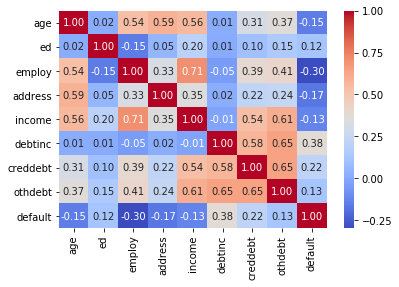

In [12]:
#visualize the correlation using seaborn heatmap
sns.heatmap(data_exist.corr(),annot= True,fmt= '0.2f',cmap='coolwarm')
plt.show()

In [13]:
print(data_exist.shape)
print(data_new.shape)

(700, 9)
(150, 9)


In [14]:
#Frequency Distribution of Default
print(data_exist.default.value_counts())
print(round(data_exist.default.value_counts()/data_exist.shape[0]* 100,2))

0.0    517
1.0    183
Name: default, dtype: int64
0.0    73.86
1.0    26.14
Name: default, dtype: float64


Text(0.5, 1.0, 'Distribution of Default')

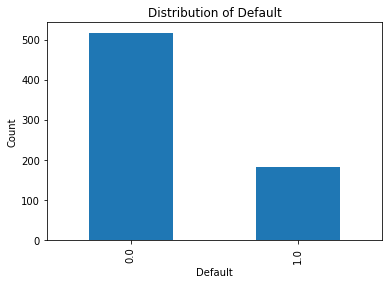

In [15]:
data_exist.default.value_counts().plot.bar()
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Distribution of Default')

### Data Exploratory analysis
 * Univariate Analysis - Numeric(TTest)/Categorical(chisquare)

In [16]:
numeric_var_names = data_exist.columns
numeric_var_names=numeric_var_names.drop('default')

**Uni-Variate and Bi-Variate Analysis**

In [17]:
from matplotlib.backends.backend_pdf import PdfPages

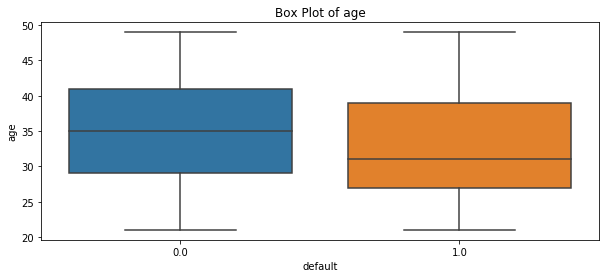

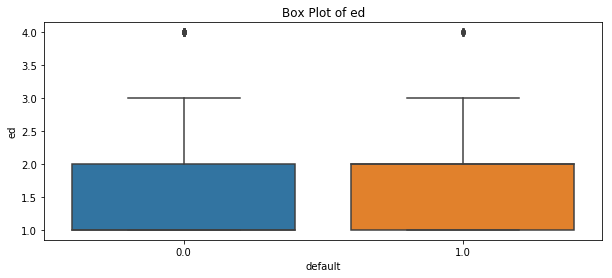

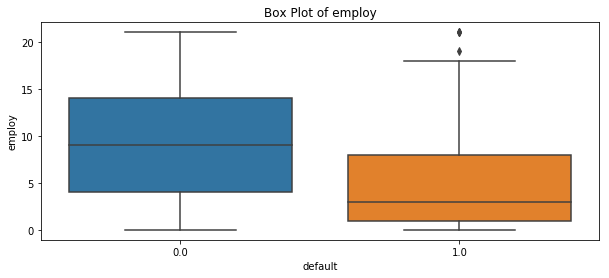

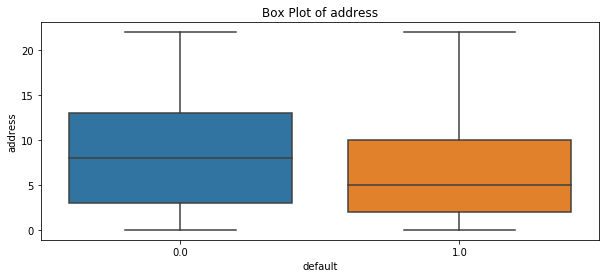

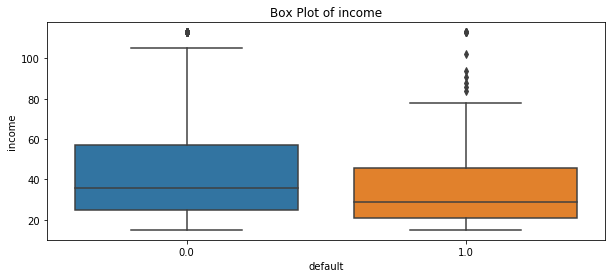

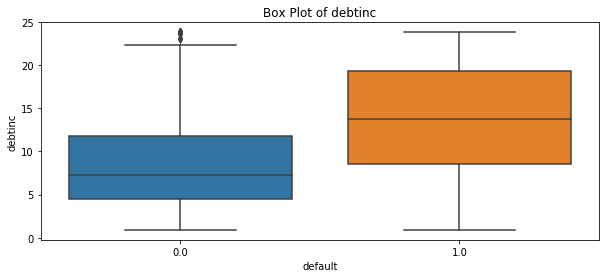

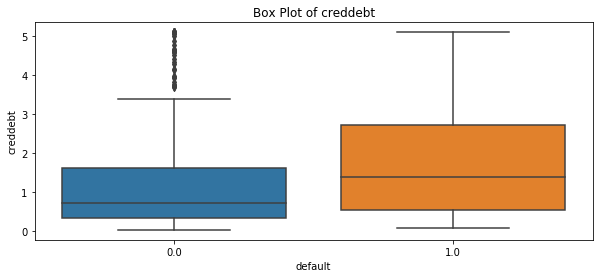

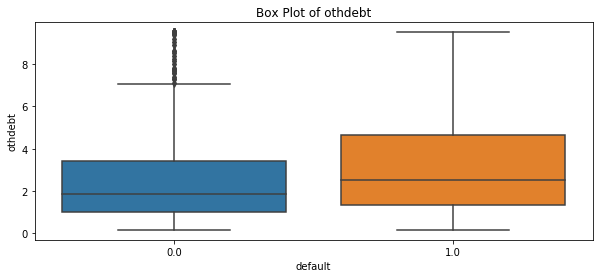

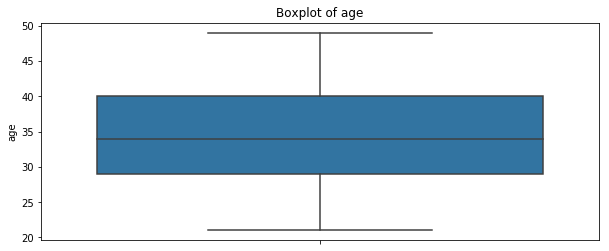

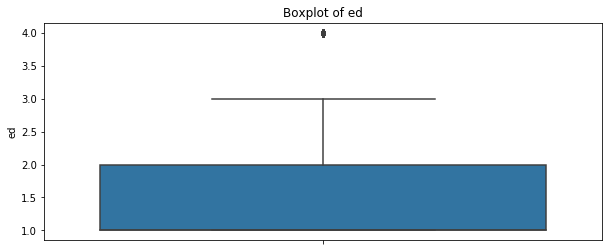

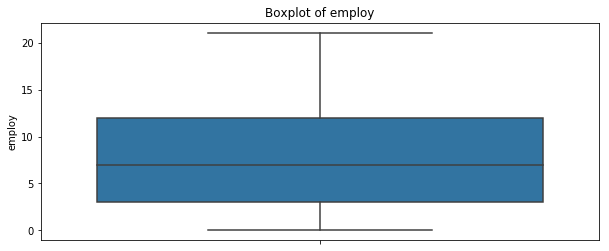

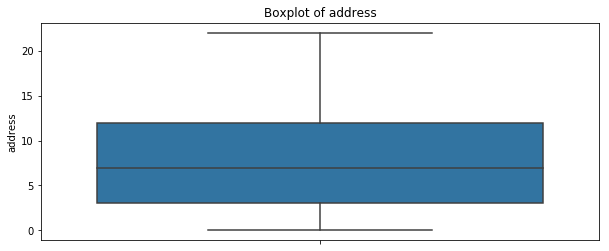

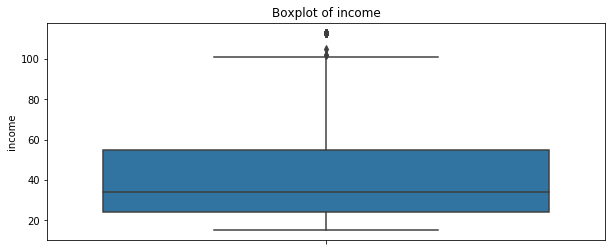

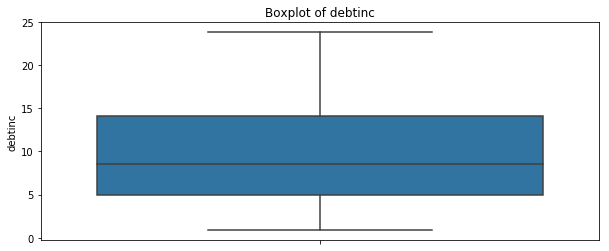

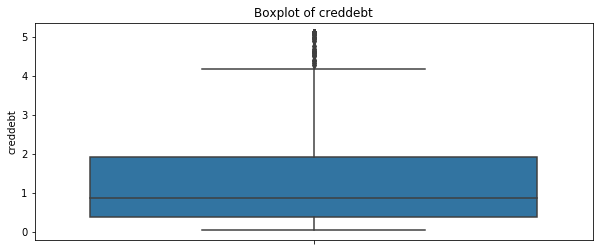

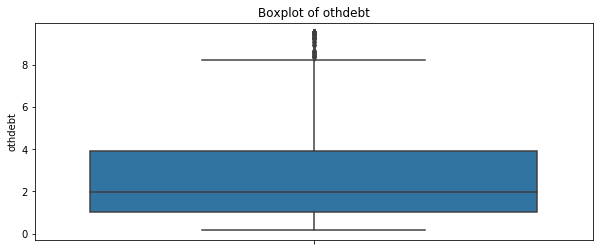

In [18]:
### Bivariate boxplot
box_plot = PdfPages('BoxPlots with Default Split.pdf')

for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='default',y=num_variable,data = data_exist)
    plt.title(str('Box Plot of ') + str(num_variable))
    box_plot.savefig(fig)
box_plot.close()
### Uivariate boxplot 
box_plot= PdfPages('Boxplot with Total View.pdf')

for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable,data= data_exist)
    plt.title(str('Boxplot of ')+ str(num_variable))
    box_plot.savefig(fig)
box_plot.close()


In [19]:
tstats_df = pd.DataFrame()
for num_variable in numeric_var_names:
    tstats = stats.ttest_ind(data_exist[data_exist['default']==1][num_variable],data_exist[data_exist['default']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

  Variable Name T-Statistic      P-Value
0           age    -3.96667  8.04114e-05
1            ed     3.15351   0.00168236
2        employ    -8.22834  9.29726e-16
3       address    -4.49688  8.07382e-06
4        income    -3.33454  0.000899569
5       debtinc     10.8941  1.24191e-25
6      creddebt     5.89774  5.74188e-09
7       othdebt     3.33658  0.000893111


**Multi Collinearity Check**

In [20]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
fetures = '+'.join(data_exist.columns.difference(['default']))
fetures

'address+age+creddebt+debtinc+ed+employ+income+othdebt'

In [22]:
## vif(variance inflation factor)
x,y = dmatrices(formula_like='default ~' + fetures,data=data_exist,return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(y.values,i)for i in range(y.shape[1])]
vif['Features'] = y.columns
vif

,VIF Factor,Features
0,41.582718,Intercept
1,1.549126,address
2,2.068488,age
3,2.923224,creddebt
4,5.029469,debtinc
5,1.292434,ed
6,2.623756,employ
7,5.888177,income
8,5.322683,othdebt


From VIF check ,we found out that the correlation between the variables is within the acceptable limit.

### Implementing the model

**Logistic Regression**

In [23]:
f_col =data_exist.columns.difference(['default'])
f_col

Index(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'],
      dtype='object')

In [24]:
X_train,X_test,y_train,y_test = train_test_split(data_exist[f_col],data_exist.default,test_size=0.2,stratify = data_exist.default, random_state= 123)
print(X_train.shape)
print(X_test.shape)

(560, 8)
(140, 8)


In [25]:
### Building Model
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
### Coefficients
coff = pd.DataFrame({'Features':pd.Series(f_col),'coefficient': pd.Series(log_reg.coef_[0])})
coff

,Features,coefficient
0,address,-0.102262
1,age,0.013322
2,creddebt,0.620346
3,debtinc,0.072165
4,ed,0.086064
5,employ,-0.216432
6,income,0.000912
7,othdebt,0.052471


In [27]:
log_reg.intercept_

array([-1.33253132])

In [28]:
### Predicting test case
data_test_pred = pd.DataFrame({'actual':y_test,'predicted': log_reg.predict(X_test)})
data_test_pred = data_test_pred.reset_index()
data_test_pred.head()

,index,actual,predicted
0,145,0.0,0.0
1,526,0.0,0.0
2,689,0.0,0.0
3,430,1.0,1.0
4,245,0.0,0.0


In [29]:
### Confusion Matrix

cm_lg = metrics.confusion_matrix(data_test_pred.actual,data_test_pred.predicted,labels = [1,0])
cm_lg

array([[20, 17],
       [10, 93]], dtype=int64)

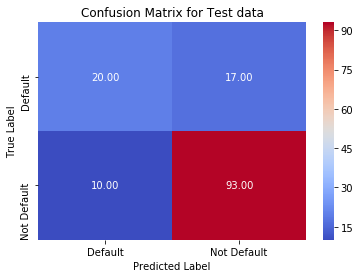

In [30]:
### visualizing confusion matrix

sns.heatmap(cm_lg,annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels = ["Default", "Not Default"] , yticklabels = ["Default", "Not Default"])
plt.title("Confusion Matrix for Test data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [31]:
## Precision Score
precision = metrics.precision_score(data_test_pred.actual,data_test_pred.predicted)
print('Precision score of model : ', round(precision,3))
## Accuracy of model
accuracy = metrics.accuracy_score(data_test_pred.actual,data_test_pred.predicted)
print('Accuracy of model :',round(accuracy,3))

Precision score of model :  0.667
Accuracy of model : 0.807


In [32]:
predict_prob = pd.DataFrame(log_reg.predict_proba(X_test))

In [33]:
predict_prob.columns = ['default_0','default_1']
predict_prob.head()

,default_0,default_1
0,0.807222,0.192778
1,0.940954,0.059046
2,0.710610,0.289390
3,0.178634,0.821366
4,0.633533,0.366467


In [34]:
data_test_pred = pd.concat([data_test_pred,predict_prob],axis=1)
data_test_pred.head()

,index,actual,predicted,default_0,default_1
0,145,0.0,0.0,0.807222,0.192778
1,526,0.0,0.0,0.940954,0.059046
2,689,0.0,0.0,0.710610,0.289390
3,430,1.0,1.0,0.178634,0.821366
4,245,0.0,0.0,0.633533,0.366467


In [35]:
### AUC Score
auc= metrics.roc_auc_score(data_test_pred.actual,data_test_pred['default_1'])
auc

0.8677512463920231

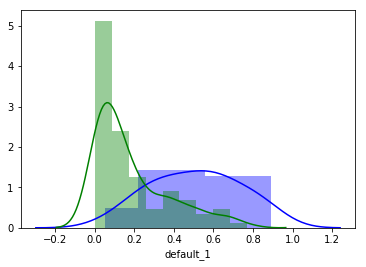

In [36]:
sns.distplot(data_test_pred[data_test_pred.actual ==1]['default_1'],color = 'b')
sns.distplot(data_test_pred[data_test_pred.actual ==0]['default_1'],color = 'g')

In [37]:
### Classification Report 
print(metrics.classification_report(data_test_pred.actual,data_test_pred.predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       103
         1.0       0.67      0.54      0.60        37

   micro avg       0.81      0.81      0.81       140
   macro avg       0.76      0.72      0.74       140
weighted avg       0.80      0.81      0.80       140



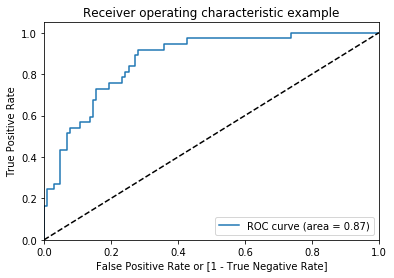

In [38]:
fpr, tpr, thresholds = metrics.roc_curve( data_test_pred.actual,
                                     data_test_pred.default_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [39]:
print(thresholds[0:10])
print(fpr[0:10])
print(tpr[0:10])

[1.89297388 0.89297388 0.88999012 0.86231982 0.82136599 0.78300476
 0.77335414 0.76957753 0.76114646 0.7388173 ]
[0.         0.         0.         0.         0.         0.
 0.         0.00970874 0.00970874 0.00970874]
[0.         0.02702703 0.05405405 0.08108108 0.10810811 0.13513514
 0.16216216 0.16216216 0.18918919 0.21621622]


In [40]:

i = np.arange(len(tpr))

roc_like_df = pd.DataFrame({'falsepositiverate' : pd.Series(fpr, index=i),'sensitivity' : pd.Series(tpr, index = i), 
              'specificity' : pd.Series(1-fpr, index = i),'cutoff' : pd.Series(thresholds, index = i)})
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [41]:
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,falsepositiverate,sensitivity,specificity,cutoff,total
63,0.281553,0.918919,0.718447,0.225317,1.637366


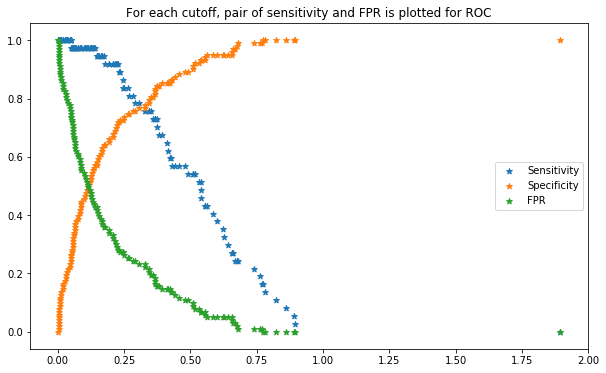

In [42]:
plt.subplots(figsize=(10,6))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['falsepositiverate'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

plt.show()

In [43]:
#Predicting with new cut-off probability
data_test_pred['new_labels'] = data_test_pred['default_1'].map(lambda x:1 if x >= 0.225317 else 0 )
data_test_pred.head(10)

,index,actual,predicted,default_0,default_1,new_labels
0,145,0.0,0.0,0.807222,0.192778,0
1,526,0.0,0.0,0.940954,0.059046,0
2,689,0.0,0.0,0.710610,0.289390,1
3,430,1.0,1.0,0.178634,0.821366,1
4,245,0.0,0.0,0.633533,0.366467,1
5,491,1.0,0.0,0.718143,0.281857,1
6,696,0.0,0.0,0.785178,0.214822,0
7,504,1.0,1.0,0.338937,0.661063,1
8,380,0.0,0.0,0.913349,0.086651,0
9,566,0.0,0.0,0.978674,0.021326,0


Text(0.5, 15.0, 'Predicted label')

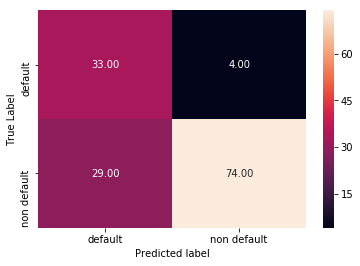

In [44]:
#creating a confusion matrix
cm = metrics.confusion_matrix(data_test_pred.actual,
                             data_test_pred.new_labels,[1,0])
sns.heatmap(cm,annot= True,fmt = '.2f',xticklabels=['default','non default'],yticklabels=['default','non default'])
plt.ylabel('True Label')
plt.xlabel('Predicted label')

In [45]:
### Classification Report 
print(metrics.classification_report(data_test_pred.actual,data_test_pred.new_labels))

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82       103
         1.0       0.53      0.89      0.67        37

   micro avg       0.76      0.76      0.76       140
   macro avg       0.74      0.81      0.74       140
weighted avg       0.84      0.76      0.78       140



In [46]:
##Intuitively the ability of the classifier to find all the positive samples

recall_score = metrics.recall_score(data_test_pred.actual,data_test_pred.new_labels)
print('recall_model :',round(recall_score,3))

recall_model : 0.892


In [47]:
#find the overall accuracy of model
acc_score = metrics.accuracy_score(data_test_pred.actual,data_test_pred.new_labels)
print("Accuracy of Logistic Regression model :",round(acc_score,3))

Accuracy of Logistic Regression model : 0.764


### Building Decision Tree

In [48]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [49]:
#make a pipeline for decision tree model
pipelines = {
 'dtclass': make_pipeline(DecisionTreeClassifier(random_state = 10))
 }

In [50]:
#To check the accuracy of the pipeline
scores = cross_validate(pipelines['dtclass'],X_train,y_train,return_train_score= True)
scores['test_score'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.732160312805474


**Cross-Validation and Hyper Parameters Tuning**
Cross Validation is the process of finding the best combination of parameters for the model by traning and evaluating the model for each combination of the parameters
Declare a hyper-parameters to fine tune the Decision Tree Classifier

**Decision Tree is a greedy alogritum it searches the entire space of possible decision trees. so we need to find a optimum parameter(s) or criteria for stopping the decision tree at some point. We use the hyperparameters to prune the decision tree**

In [51]:
#list of trouble hyper paarameters for decision tree classifier pipeline

pipelines['dtclass'].get_params().keys()

dict_keys(['memory', 'steps', 'decisiontreeclassifier', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [52]:
decisiontree_pyperparameters = {
    'decisiontreeclassifier__max_depth': np.arange(3,10),
    'decisiontreeclassifier__max_features': np.arange(3,8),
    'decisiontreeclassifier__min_samples_split': np.arange(2,15),
    'decisiontreeclassifier__min_samples_leaf': np.arange(1,3)
}

### Decision Tree classifier with gini index

**Fit and tune models with cross-validation**
Now that we have our pipelines and hyperparameters dictionaries declared, we're ready to tune our models with cross-validation.
* We are doing 5 fold cross validation

In [53]:
#Create a crosss validation object from decision tree classifier and its hyperparameters
dtclass_model = GridSearchCV(pipelines['dtclass'],decisiontree_pyperparameters,cv =5,n_jobs = -1)
#fit the model
dtclass_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'decisiontreeclassifier__max_depth': array([3, 4, 5, 6, 7, 8, 9]), 'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7]), 'decisiontreeclassifier__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'decisiontreeclassifier__min_samples_leaf': array([1, 2])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
#display the best parameters for decision tree model
dtclass_model.best_params_

{'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__max_features': 3,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 11}

In [55]:
# best score of decision tree model
dtclass_model.best_score_

0.7839285714285714

In [56]:
#In Pipeline we can use the string names to get the decisiontreeclassifier
dtclass_best_model = dtclass_model.best_estimator_.named_steps['decisiontreeclassifier']
dtclass_best_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=11, min_weight_fraction_leaf=0.0,
            presort=False, random_state=10, splitter='best')

### Model Performance Evaluation
* On Test Data

In [57]:
#Predictio=ng the test cases
data_test_pred_dtclass = pd.DataFrame({'achual':y_test,'predicted': dtclass_best_model.predict(X_test)})
data_test_pred_dtclass = data_test_pred_dtclass.reset_index()
data_test_pred_dtclass.head()

,index,achual,predicted
0,145,0.0,0.0
1,526,0.0,0.0
2,689,0.0,0.0
3,430,1.0,1.0
4,245,0.0,0.0


In [58]:
#creating a confusion matrix
cm_dtclass = metrics.confusion_matrix(data_test_pred_dtclass.achual,data_test_pred_dtclass.predicted,labels = [1,0])
cm_dtclass

array([[14, 23],
       [ 8, 95]], dtype=int64)

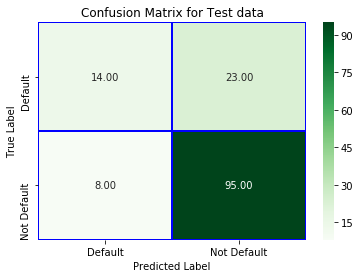

In [59]:
sns.heatmap(cm_dtclass,annot= True,fmt='.2f',cmap='Greens',linewidths= .5 , linecolor= 'blue',xticklabels=['Default','Not Default'],yticklabels=['Default','Not Default'])
plt.title('Confusion Matrix for Test data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [60]:
#probability of prediction
predict_prob_dt = pd.DataFrame(dtclass_best_model.predict_proba(X_test),columns=['default_0','default_1'])
predict_prob_dt.head()

,default_0,default_1
0,0.560000,0.440000
1,0.958763,0.041237
2,0.560000,0.440000
3,0.000000,1.000000
4,0.800000,0.200000


In [61]:
data_test_pred_dtclass = pd.concat([data_test_pred_dtclass,predict_prob_dt],axis=1)
data_test_pred_dtclass.head()

,index,achual,predicted,default_0,default_1
0,145,0.0,0.0,0.560000,0.440000
1,526,0.0,0.0,0.958763,0.041237
2,689,0.0,0.0,0.560000,0.440000
3,430,1.0,1.0,0.000000,1.000000
4,245,0.0,0.0,0.800000,0.200000


In [62]:
# find the auc score
auc_score = metrics.roc_auc_score(data_test_pred_dtclass.achual, data_test_pred_dtclass.default_1)
round(auc_score,4)

0.7385

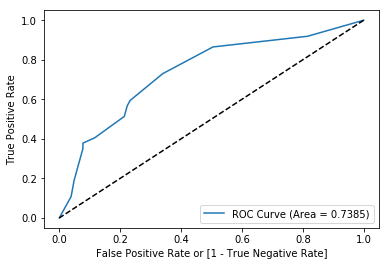

In [63]:
#plotting the roc curve
fpr, tpr, thresholds = metrics.roc_curve(data_test_pred_dtclass.achual, data_test_pred_dtclass.default_1,drop_intermediate=False)

plt.plot(fpr, tpr, label = "ROC Curve (Area = %0.4f)" % auc_score)
plt.plot([1,0],[1,0],'k--')

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate or [1 - True Negative Rate]")

plt.legend(loc = "lower right")
plt.show()

In [64]:
# find precision score
prec_score = metrics.precision_score(data_test_pred_dtclass.achual,data_test_pred_dtclass.predicted)
print('Precision score :',round(prec_score,3))

Precision score : 0.636


In [65]:
# finding overall accuracy of model
acc_score = metrics.accuracy_score(data_test_pred_dtclass.achual,data_test_pred_dtclass.predicted)
print('Accuracy score :',round(acc_score,3))

Accuracy score : 0.779


In [66]:
print(metrics.classification_report(data_test_pred_dtclass.achual,data_test_pred_dtclass.predicted))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       103
         1.0       0.64      0.38      0.47        37

   micro avg       0.78      0.78      0.78       140
   macro avg       0.72      0.65      0.67       140
weighted avg       0.76      0.78      0.76       140



In [67]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus as pdot

In [68]:
# writing the dot data
dot_data= StringIO()

In [69]:
# export the decesion tree along with the features names into a dot file format
export_graphviz(dtclass_best_model,out_file = dot_data,filled= True,special_characters=True,rounded=True,feature_names=X_train.columns.values,class_names=['NO','YES'])

In [70]:
# make a graph from dot line
graph = pdot.graph_from_dot_data(dot_data.getvalue())

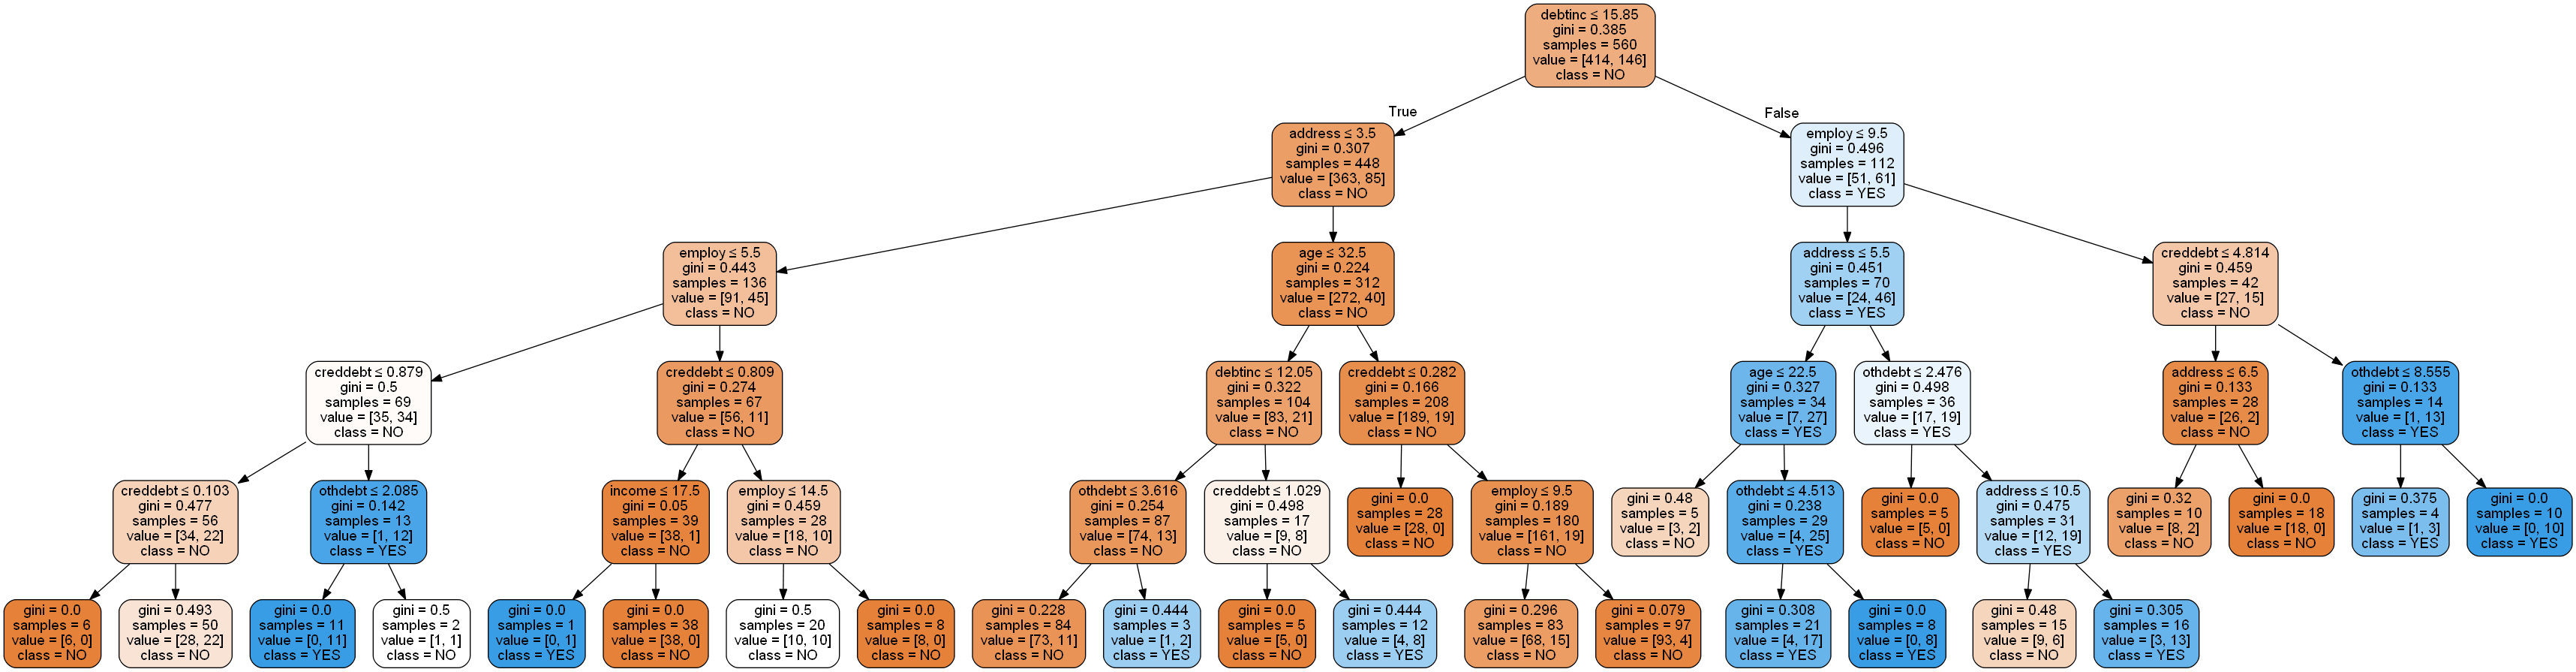

In [71]:
Image(graph.create_png())

## Model Selecton and Bussiness Insights

* Based on the F1-score (harmonic mean of precision and recall), logistic model with f1 score (for positive labels - default customers) of 0.66 is giving better results than decision tree model with f1 score of 0.44. So we will use the logistic regression model to predict the credit worthiness of the customers

We will Predict the credit risk for remaining 150 customers using the logistic modelwith cuttoff as 0.225

In [76]:
#probability for new customers
new_cust_prob = pd.DataFrame(log_reg.predict_proba(data_new[f_col]))
new_cust_prob.columns = ['prob_default_0','prob_default_1']
new_cust_prob.index = data_new.index
new_cust_prob.head()

,prob_default_0,prob_default_1
700,0.985956,0.014044
701,0.942684,0.057316
702,0.322770,0.677230
703,0.918032,0.081968
704,0.634286,0.365714


In [77]:
data_new_predicted = pd.concat([data_new,new_cust_prob],axis=1)
data_new_predicted.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,prob_default_0,prob_default_1
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.985956,0.014044
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.942684,0.057316
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,0.322770,0.677230
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.918032,0.081968
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.634286,0.365714


In [79]:
#using the cutoff value we will predict the default
data_new_predicted['predicted_default'] = data_new_predicted['prob_default_1'].map(lambda x:1 if x >= 0.225317 else 0 )

In [80]:
data_new_predicted.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,prob_default_0,prob_default_1,predicted_default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.985956,0.014044,0
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.942684,0.057316,0
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,0.322770,0.677230,1
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.918032,0.081968,0
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.634286,0.365714,1


In [81]:
#model Prediction
data_new_predicted.predicted_default.value_counts()

0    85
1    65
Name: predicted_default, dtype: int64

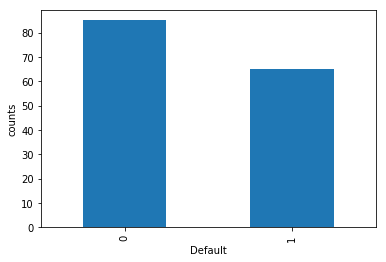

In [82]:
#model Prediction
data_new_predicted.predicted_default.value_counts().plot.bar()
plt.ylabel('counts')
plt.xlabel('Default')
plt.show()

## Insights

* Out of 150 customers, model as predicted that 85 customer are not going to default on the bank loan and remaining 65 customer would most likely default on the loan.

### Model Performance Validation
   * KS Chart
   * Lift and Gain Chart
   
we will use the concept of dicile analysis for these validations

In [83]:
#For train data

train_predict = pd.DataFrame({'achual':y_train.reset_index(drop = True),
                             'prob': pd.DataFrame(log_reg.predict_proba(X_train))[1]})
train_predict['predicted']= train_predict['prob'].map(lambda x: 1 if x > 0.225 else 0 )
train_predict.head()

,achual,prob,predicted
0,0.0,0.265726,1
1,0.0,0.008757,0
2,0.0,0.033043,0
3,0.0,0.152921,0
4,1.0,0.134084,0


In [85]:
#for test data
test_predict = pd.DataFrame({'achual': y_test.reset_index(drop = True),
                             'prob':pd.DataFrame(log_reg.predict_proba(X_test))[1]})
test_predict['predicted'] = test_predict['prob'].map(lambda x: 1 if x > 0.225 else 0 )
test_predict.head()

,achual,prob,predicted
0,0.0,0.192778,0
1,0.0,0.059046,0
2,0.0,0.289390,1
3,1.0,0.821366,1
4,0.0,0.366467,1


In [88]:
#splitting train data into different diciles

train_predict['Deciles']=pd.qcut(train_predict['prob'],10,labels = False)
train_predict.head()

,achual,prob,predicted,Deciles
0,0.0,0.265726,1,6
1,0.0,0.008757,0,0
2,0.0,0.033043,0,1
3,0.0,0.152921,0,4
4,1.0,0.134084,0,3


In [87]:
#splitting test data into different diciles

test_predict['Deciles']=pd.qcut(test_predict['prob'],10,labels = False)
test_predict.head()

,achual,prob,predicted,Deciles
0,0.0,0.192778,0,5
1,0.0,0.059046,0,2
2,0.0,0.289390,1,6
3,1.0,0.821366,1,9
4,0.0,0.366467,1,6


In [89]:
#sumation od deciles for the train data
train_predict[['Deciles','achual']].groupby(train_predict.Deciles).sum().sort_index(ascending = False)

,Deciles,achual
Deciles,,
9,504,44.0
8,448,31.0
7,392,18.0
6,336,20.0
5,280,12.0
4,224,8.0
3,168,7.0
2,112,4.0
1,56,2.0


In [90]:
#sumation of deciles for the train data
test_predict[['Deciles','achual']].groupby(test_predict.Deciles).sum().sort_index(ascending = False)

,Deciles,achual
Deciles,,
9,126,10.0
8,112,10.0
7,98,6.0
6,84,4.0
5,70,4.0
4,56,2.0
3,42,0.0
2,28,0.0
1,14,1.0


In [91]:
train_predict[['Deciles','achual']].groupby(train_predict.Deciles).count().sort_index(ascending = False)

,Deciles,achual
Deciles,,
9,56,56
8,56,56
7,56,56
6,56,56
5,56,56
4,56,56
3,56,56
2,56,56
1,56,56


In [92]:
test_predict[['Deciles','achual']].groupby(test_predict.Deciles).count().sort_index(ascending = False)

,Deciles,achual
Deciles,,
9,14,14
8,14,14
7,14,14
6,14,14
5,14,14
4,14,14
3,14,14
2,14,14
1,14,14


### KS & LIft, Gain Chart
* Training dataset
* Testing dataset

In [95]:
from IPython.display import Image

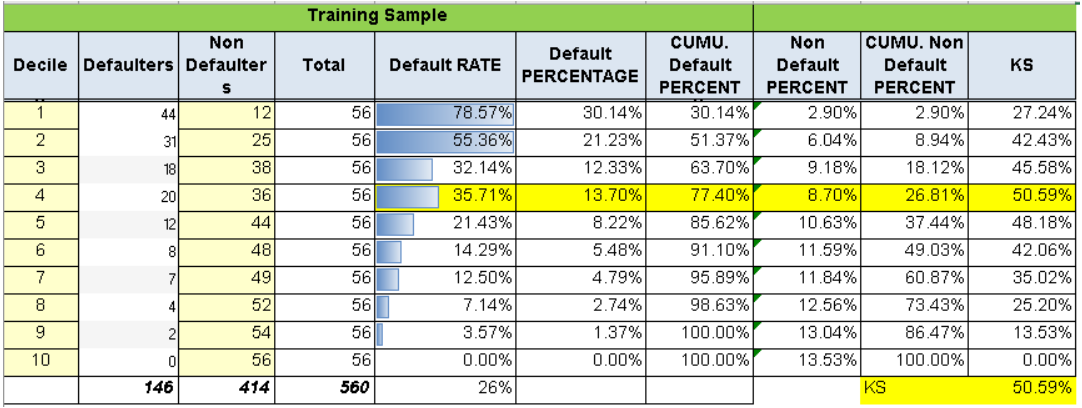

In [110]:
#for Training data set
Image(filename= 'Images/KS-Traindata.png',width=600)

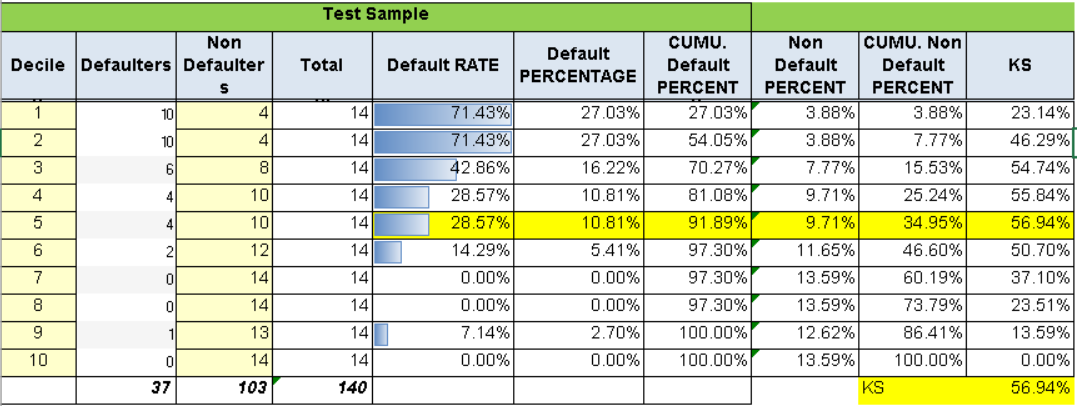

In [111]:
#For Test data set
Image(filename="Images/KS-Testdata.png",width=600)

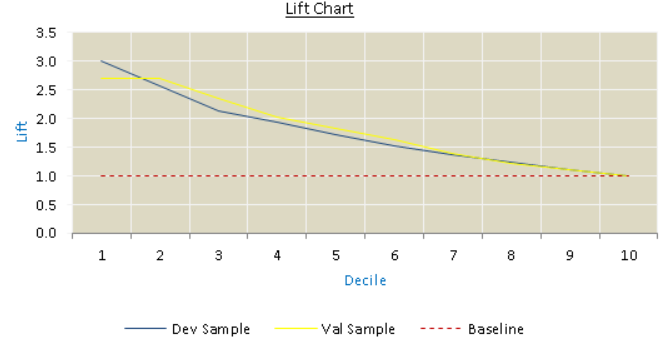

In [112]:
##Lift Chart 
Image(filename="Images/LiftChart.png",width=500)

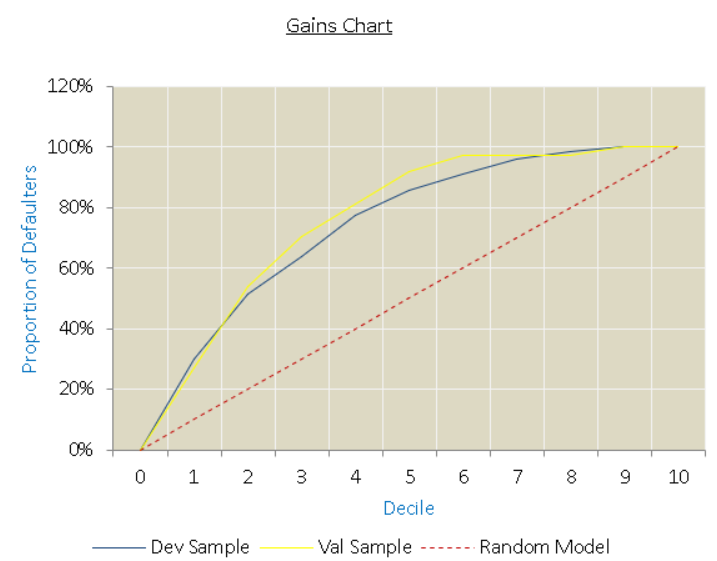

In [113]:
##Gain Chart 
Image(filename="Images/GainsChart.png",width=500)

### Obsevations
* Gain chart tells % of targets(events)covered at a given decile level. In the current case ,we can say that we can identify 90% of the defaulters who are likely to default on the loan by just analyzing 50% of the total customers.
* Lift chart measures how much better one can expect to do with the predictive model comparing without a model. In the current model, cummulative lift for top two deciles is 2.7, means that by selecting 20% of the records based on the model. One can expect 2.7 times the total number of defaulters to be found than the randomly selecting 20% of the data without a model.

### Finally, let's save the winning model.

* We need to save our prediction models to file, and then restore them in order to reuse our previous work to: test our model on new data, compare multiple models, or anything else.
* Pickle is the standard way of serializing objects in Python.Pickle operation to serialize your machine learning algorithms and save the serialized format to a file.
* Later we can load this file to deserialize your model and use it to make new predictions.

In [102]:
import pickle

Let's save the winning Logistic Model Object into a pickle file.


In [106]:
with open('Final_model.pkl','wb') as f:
    pickle.dump(log_reg,f)

In [108]:
# some time later...
 
# load the model from disk - use to classify the default customers directly
#loaded_model = pickle.load(open('OutPutModel/final_model.pkl', 'rb'))